In [2]:
%pip install numpy

In [35]:
import numpy as np
import matplotlib.pyplot as plt
x= np.linspace(-4,4,num=210)
# print(x)

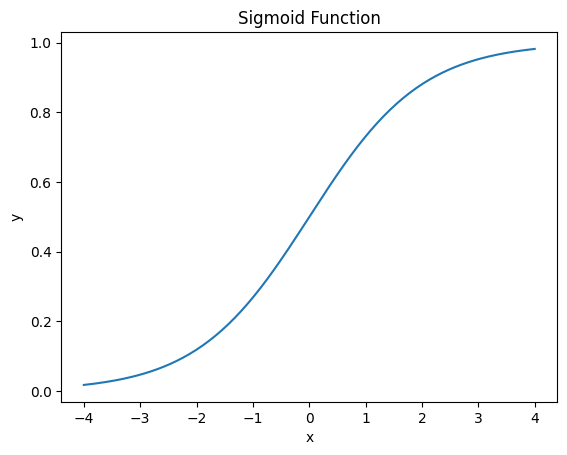

In [36]:
def sigmoid(x):
  y=1/(1+np.exp(-x))
  return y
y=np.array([sigmoid(xi) for xi in x])
plt.plot(x,y,label="Sigmoid")
plt.xlabel('x')
plt.ylabel('y')
# plt.axhline(0,color='black')
# plt.axvline(0,color='black')
plt.title('Sigmoid Function')
plt.show()

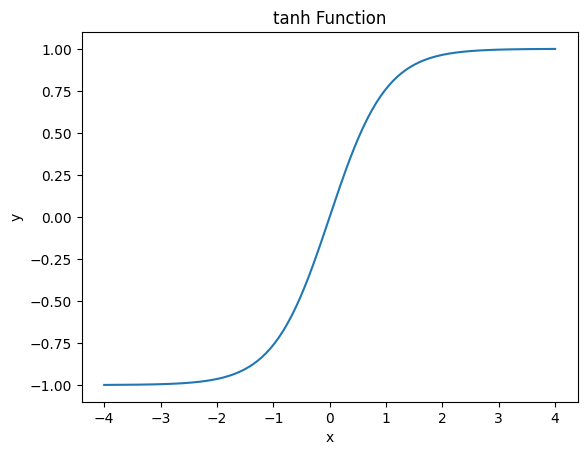

In [37]:
def tanh(x):
  numerator=(1-np.exp(-2*x))
  denominator=(1+np.exp(-2*x))
  return numerator/denominator

y=np.array([tanh(xi) for xi in x])
plt.plot(x,y,label="tanh")
plt.xlabel('x')
plt.ylabel('y')
# plt.axhline(0,color='black')
# plt.axvline(0,color='black')
plt.title('tanh Function')
plt.show()

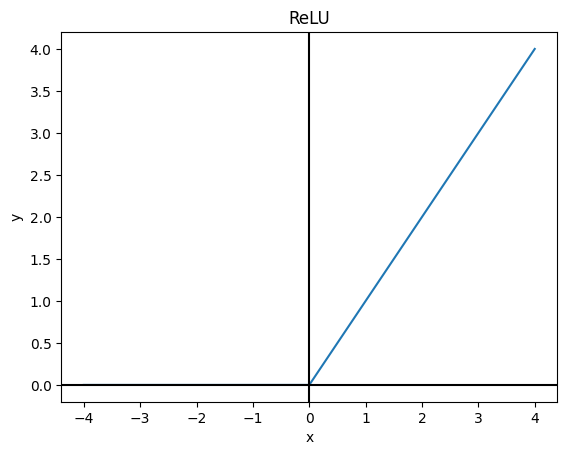

In [38]:
def ReLU(x):
  if x<0:
    return 0
  else:
    return x

y=np.array([ReLU(xi) for xi in x])
plt.plot(x,y,label="ReLU")
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0,color='black')
plt.axvline(0,color='black')
plt.title("ReLU")
plt.show()

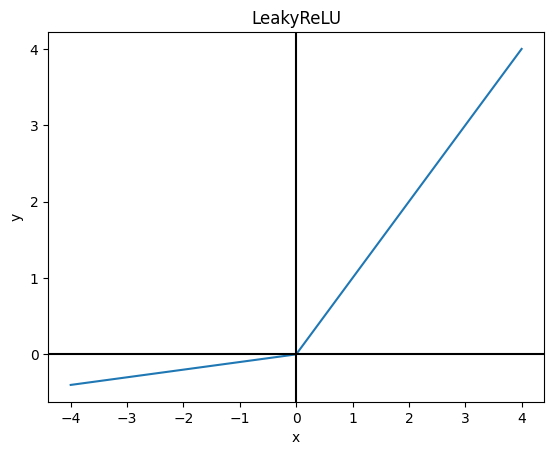

In [39]:
def leakyReLU(x,alpha=0.1):
  if x<0:
    return alpha*x
  else:
    return x

y=np.array([leakyReLU(xi) for xi in x])
plt.plot(x,y,label="leakyReLU")
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0,color='black')
plt.axvline(0,color='black')
plt.title("LeakyReLU")
plt.show()


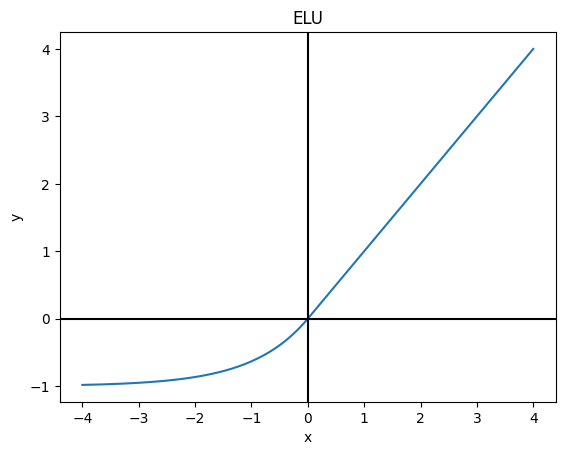

In [46]:
def ELU(x,alpha=1):
  if x<0:
    return alpha*(np.exp(x)-1)
  else:
    return x

y=np.array([ELU(xi) for xi in x])
plt.plot(x,y,label="ELU")
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0,color='black')
plt.axvline(0,color='black')
plt.title("ELU")
plt.show()

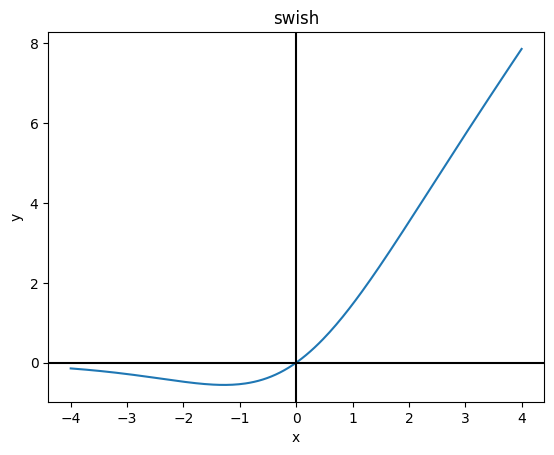

In [47]:
def swish(x,beta=1):
  return 2*x*sigmoid(beta*x)

y=np.array([swish(xi) for xi in x])
plt.plot(x,y,label="swish")
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0,color='black')
plt.axvline(0,color='black')
plt.title("swish")
plt.show()


In [65]:
def softmax(x):
  return np.exp(x)/np.exp(x).sum(axis=0)
x1=np.array([8,6,5,3])
y1=softmax(x1)
print(y1)


[0.83902451 0.11354962 0.04177257 0.0056533 ]


In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data as shown in the above XOR table:
x = np.array([ [0, 1], [1, 0], [1, 1],[0, 0] ])
y = np.array([ [1], [1], [0], [0]])

# Define the number of nodes in each layer:
num_input = 2
num_hidden = 5
num_output = 1

# Initialize weights and bias randomly. First, we initialize, input to hidden layer weights:
Wxh = np.random.randn(num_input,num_hidden)
bh = np.zeros((1,num_hidden))

# Now initialize, hidden to output layer weights:
Why = np.random.randn (num_hidden,num_output)
by = np.zeros((1,num_output))

# Define the sigmoid activation function:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

# Define the derivative of the sigmoid function:
def sigmoid_derivative(z):
    return np.exp(-z)/((1+np.exp(-z))**2)

# Define the forward propagation:
def forward_prop(x,Wxh,Why):
    z1 = np.dot(x,Wxh) + bh
    a1 = sigmoid(z1)
    z2 = np.dot(a1,Why) + by
    y_hat = sigmoid(z2)
    return z1,a1,z2,y_hat

# Define the backward propagation:
def backword_prop(y_hat, z1, a1, z2):
    delta2 = np.multiply(-(y-y_hat),sigmoid_derivative(z2))
    dJ_dWhy = np.dot(a1.T, delta2)
    delta1 = np.dot(delta2,Why.T)*sigmoid_derivative(z1)
    dJ_dWxh = np.dot(x.T, delta1)
    return dJ_dWxh, dJ_dWhy

# Define the cost function:
def cost_function(y, y_hat):
    J = 0.5*sum((y-y_hat)**2)
    return J

In [68]:
# Set the learning rate and number of training iterations:
alpha = 0.01
num_iterations = 5000

# Now let's start training the network:

cost = []
for i in range(num_iterations):

    #perform forward propagation and predict output
    z1,a1,z2,y_hat = forward_prop(x,Wxh,Why)

    #perform backward propagation and calculate gradients
    dJ_dWxh, dJ_dWhy = backword_prop(y_hat, z1, a1, z2)

    #update the weights
    Wxh = Wxh -alpha * dJ_dWxh
    Why = Why -alpha * dJ_dWhy

    #compute cost
    c = cost_function(y, y_hat)

    #store the cost
    cost.append(c)

Text(0, 0.5, 'Cost')

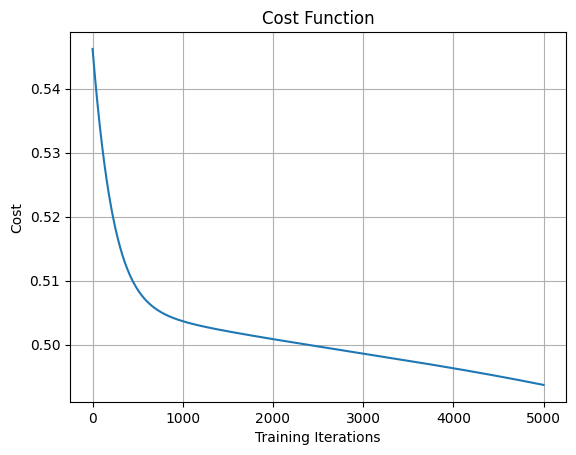

In [69]:
# Plot the cost function:

plt.grid()
plt.plot(range(num_iterations),cost)
plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')